In [30]:
import pandas as pd
import seaborn as sns
from google.colab import drive
from sqlalchemy import create_engine
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#Get Data
df= pd.DataFrame(pd.read_csv('/content/drive//MyDrive/code/Data_Set/Video_Games_Sales_as_at_22_Dec_2016.csv'))
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#shape  
df.shape

(16719, 16)

In [33]:
#See if any null
df.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [34]:
# How many null values in each field 
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [35]:
df.isnull().corr()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,1.000000,NaN,-0.001399,1.000000,-0.000623,NaN,NaN,NaN,NaN,NaN,0.010651,0.010651,0.009973,0.009973,0.013505,0.013261
Platform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,-0.001399,NaN,1.000000,-0.001399,0.177042,NaN,NaN,NaN,NaN,NaN,-0.021951,-0.021951,-0.004660,-0.004660,-0.025816,-0.020250
Genre,1.000000,NaN,-0.001399,1.000000,-0.000623,NaN,NaN,NaN,NaN,NaN,0.010651,0.010651,0.009973,0.009973,0.013505,0.013261
Publisher,-0.000623,NaN,0.177042,-0.000623,1.000000,NaN,NaN,NaN,NaN,NaN,0.046992,0.046992,0.039201,0.039201,0.050884,0.053982
NA_Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EU_Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JP_Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other_Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global_Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
curr_df = df.isnull().corr().dropna(how='all').dropna(axis='columns', how = 'all')
curr_df

,Name,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,1.000000,-0.001399,1.000000,-0.000623,0.010651,0.010651,0.009973,0.009973,0.013505,0.013261
Year_of_Release,-0.001399,1.000000,-0.001399,0.177042,-0.021951,-0.021951,-0.004660,-0.004660,-0.025816,-0.020250
Genre,1.000000,-0.001399,1.000000,-0.000623,0.010651,0.010651,0.009973,0.009973,0.013505,0.013261
Publisher,-0.000623,0.177042,-0.000623,1.000000,0.046992,0.046992,0.039201,0.039201,0.050884,0.053982
Critic_Score,0.010651,-0.021951,0.010651,0.046992,1.000000,1.000000,0.798699,0.798699,0.787193,0.782901
Critic_Count,0.010651,-0.021951,0.010651,0.046992,1.000000,1.000000,0.798699,0.798699,0.787193,0.782901
User_Score,0.009973,-0.004660,0.009973,0.039201,0.798699,0.798699,1.000000,1.000000,0.735818,0.731025
User_Count,0.009973,-0.004660,0.009973,0.039201,0.798699,0.798699,1.000000,1.000000,0.735818,0.731025
Developer,0.013505,-0.025816,0.013505,0.050884,0.787193,0.787193,0.735818,0.735818,1.000000,0.981979
Rating,0.013261,-0.020250,0.013261,0.053982,0.782901,0.782901,0.731025,0.731025,0.981979,1.000000


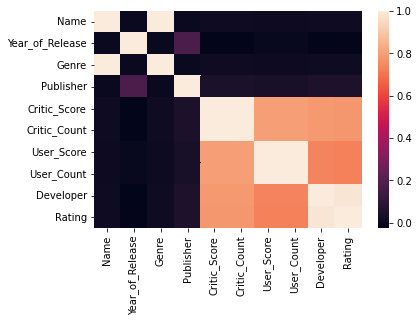

In [37]:
#Currelation of na
sns.heatmap(curr_df)

In [38]:
# Get rid of none needed 
df = df.drop([ 'User_Count', 'Critic_Count', 'Global_Sales'], axis = 1)
df = df.loc[df.Name.notnull() | df.Genre.notnull()]

In [39]:
#Set Cololumns as category
df[['Platform', 'Year_of_Release', 'Genre', 
    'Publisher', 'Rating']]=df[['Platform', 'Year_of_Release', 
                                'Genre', 'Publisher', 'Rating']].astype('category')
df = df.assign(Plat_id = df.Platform.cat.codes+1, 
               YoR_id = df.Year_of_Release.cat.codes+1, 
               Genre_id = df.Genre.cat.codes+1, 
               Publisher_id = df.Publisher.cat.codes+1,
               Rating_id = df.Rating.cat.codes+1)


df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Developer,Rating,Plat_id,YoR_id,Genre_id,Publisher_id,Rating_id
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,8.0,Nintendo,E,27,27,11,362,2
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,12,6,5,362,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,8.3,Nintendo,E,27,29,7,362,2
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,8.0,Nintendo,E,27,30,11,362,2
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,6,17,8,362,0


In [40]:
#Create Tables
platform_df = df[['Plat_id', 'Platform']].drop_duplicates().set_index('Plat_id').sort_index()
yor_df = df[['YoR_id', 'Year_of_Release']].drop_duplicates().set_index('YoR_id').sort_index()
rating_df = df[['Rating_id', 'Rating']].drop_duplicates().set_index('Rating_id').sort_index()
publisher_df = df[['Publisher_id', 'Publisher']].drop_duplicates().set_index('Publisher').sort_index()
genre_df = df[['Genre_id', 'Genre']].drop_duplicates().set_index('Genre_id').sort_index()
df.drop(columns=['Platform',	'Year_of_Release',	'Genre',	'Publisher', 'Developer',	'Rating'], inplace = True)

In [41]:
#Save db
db_path = "sqlite:///Video_Game_Sales.db"
engine = create_engine(db_path)
platform_df.to_sql(name="platform_df",con=engine, if_exists='replace')
yor_df.to_sql(name="yor_df",con=engine, if_exists='replace')
rating_df.to_sql(name="rating_df",con=engine, if_exists='replace')
publisher_df.to_sql(name="publisher_df",con=engine, if_exists='replace')
genre_df.to_sql(name="genre_df",con=engine, if_exists='replace')
df.to_sql(name="df",con=engine, if_exists='replace')

In [42]:
!cp -r /content/Video_Game_Sales.db /content/drive//MyDrive/code/Data_Set/